In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as se

In [210]:
df = pd.read_csv(r'kidney_disease.csv')

In [211]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [212]:
columns = pd.read_csv(r'data_description.txt', sep='-')
columns = columns.reset_index()

In [213]:
df.columns = columns['1. Features:'].values

In [214]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [215]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [216]:
def convert_object_to_numerical(df, feature):
    df[feature]=pd.to_numeric(df[feature], errors='coerce')

In [217]:
features = ['packed cell volume', 'white blood cell count', 'red blood cell count']

for i in features:
    convert_object_to_numerical(df, i)

In [218]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [219]:
df.drop('id', axis=1,inplace=True)

In [220]:
def extract_columns_by_type(df):
    objects = [i for i in df.columns if df[i].dtype=='object']
    numericals = [i for i in df.columns if df[i].dtype!='object']
    return objects, numericals

In [221]:
objects, numericals = extract_columns_by_type(df)

In [222]:
objects

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [223]:
numericals

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [224]:
for i in objects:
    print("{} has the values {}\n".format(i, df[i].unique()))

red blood cells has the values [nan 'normal' 'abnormal']

 pus cell has the values ['normal' 'abnormal' nan]

pus cell clumps has the values ['notpresent' 'present' nan]

bacteria has the values ['notpresent' 'present' nan]

ypertension has the values ['yes' 'no' nan]

diabetes mellitus has the values ['yes' 'no' ' yes' '\tno' '\tyes' nan]

coronary artery disease has the values ['no' 'yes' '\tno' nan]

appetite has the values ['good' 'poor' nan]

pedal edema has the values ['no' 'yes' nan]

anemia has the values ['no' 'yes' nan]

class has the values ['ckd' 'ckd\t' 'notckd']



In [225]:
df['diabetes mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes'}, inplace=True)

In [226]:
for i in objects:
    print("{} has the values {}\n".format(i, df[i].unique()))

red blood cells has the values [nan 'normal' 'abnormal']

 pus cell has the values ['normal' 'abnormal' nan]

pus cell clumps has the values ['notpresent' 'present' nan]

bacteria has the values ['notpresent' 'present' nan]

ypertension has the values ['yes' 'no' nan]

diabetes mellitus has the values ['yes' 'no' ' yes' nan]

coronary artery disease has the values ['no' 'yes' '\tno' nan]

appetite has the values ['good' 'poor' nan]

pedal edema has the values ['no' 'yes' nan]

anemia has the values ['no' 'yes' nan]

class has the values ['ckd' 'ckd\t' 'notckd']



In [227]:
df['coronary artery disease'].replace(to_replace={'\tno': 'no'}, inplace=True)

In [228]:
for i in objects:
    print("{} has the values {}\n".format(i, df[i].unique()))

red blood cells has the values [nan 'normal' 'abnormal']

 pus cell has the values ['normal' 'abnormal' nan]

pus cell clumps has the values ['notpresent' 'present' nan]

bacteria has the values ['notpresent' 'present' nan]

ypertension has the values ['yes' 'no' nan]

diabetes mellitus has the values ['yes' 'no' ' yes' nan]

coronary artery disease has the values ['no' 'yes' nan]

appetite has the values ['good' 'poor' nan]

pedal edema has the values ['no' 'yes' nan]

anemia has the values ['no' 'yes' nan]

class has the values ['ckd' 'ckd\t' 'notckd']



In [229]:
df['class'].replace(to_replace={'ckd\t': 'ckd'}, inplace=True)

In [230]:
for i in objects:
    print("{} has the values {}\n".format(i, df[i].unique()))

red blood cells has the values [nan 'normal' 'abnormal']

 pus cell has the values ['normal' 'abnormal' nan]

pus cell clumps has the values ['notpresent' 'present' nan]

bacteria has the values ['notpresent' 'present' nan]

ypertension has the values ['yes' 'no' nan]

diabetes mellitus has the values ['yes' 'no' ' yes' nan]

coronary artery disease has the values ['no' 'yes' nan]

appetite has the values ['good' 'poor' nan]

pedal edema has the values ['no' 'yes' nan]

anemia has the values ['no' 'yes' nan]

class has the values ['ckd' 'notckd']



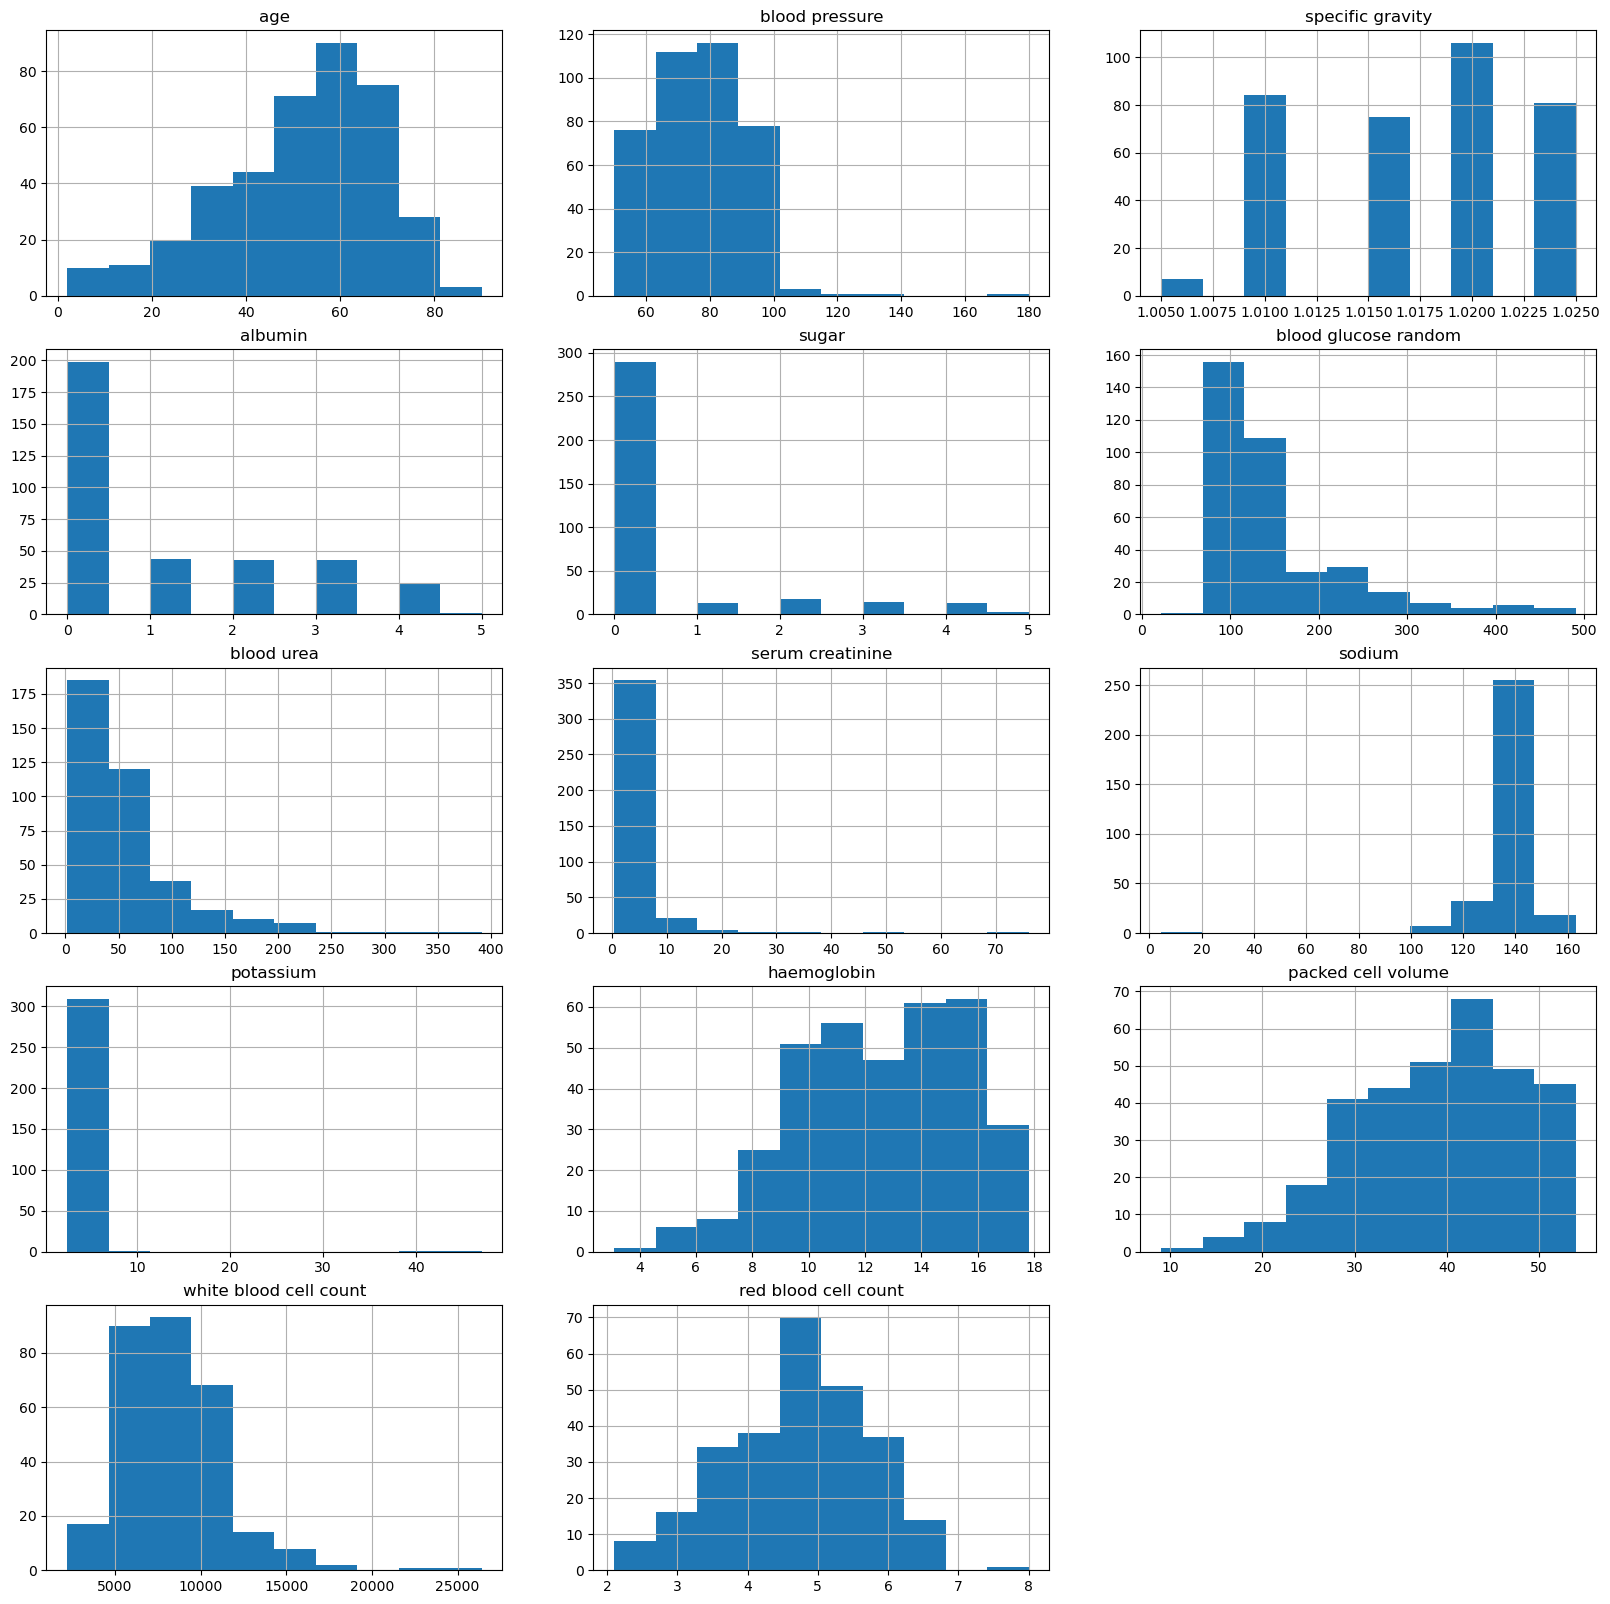

In [231]:
mat.figure(figsize=(20,20))

for i, feature in enumerate(numericals):
    mat.subplot(5, 3, i+1)
    df[feature].hist()
    mat.title(feature)

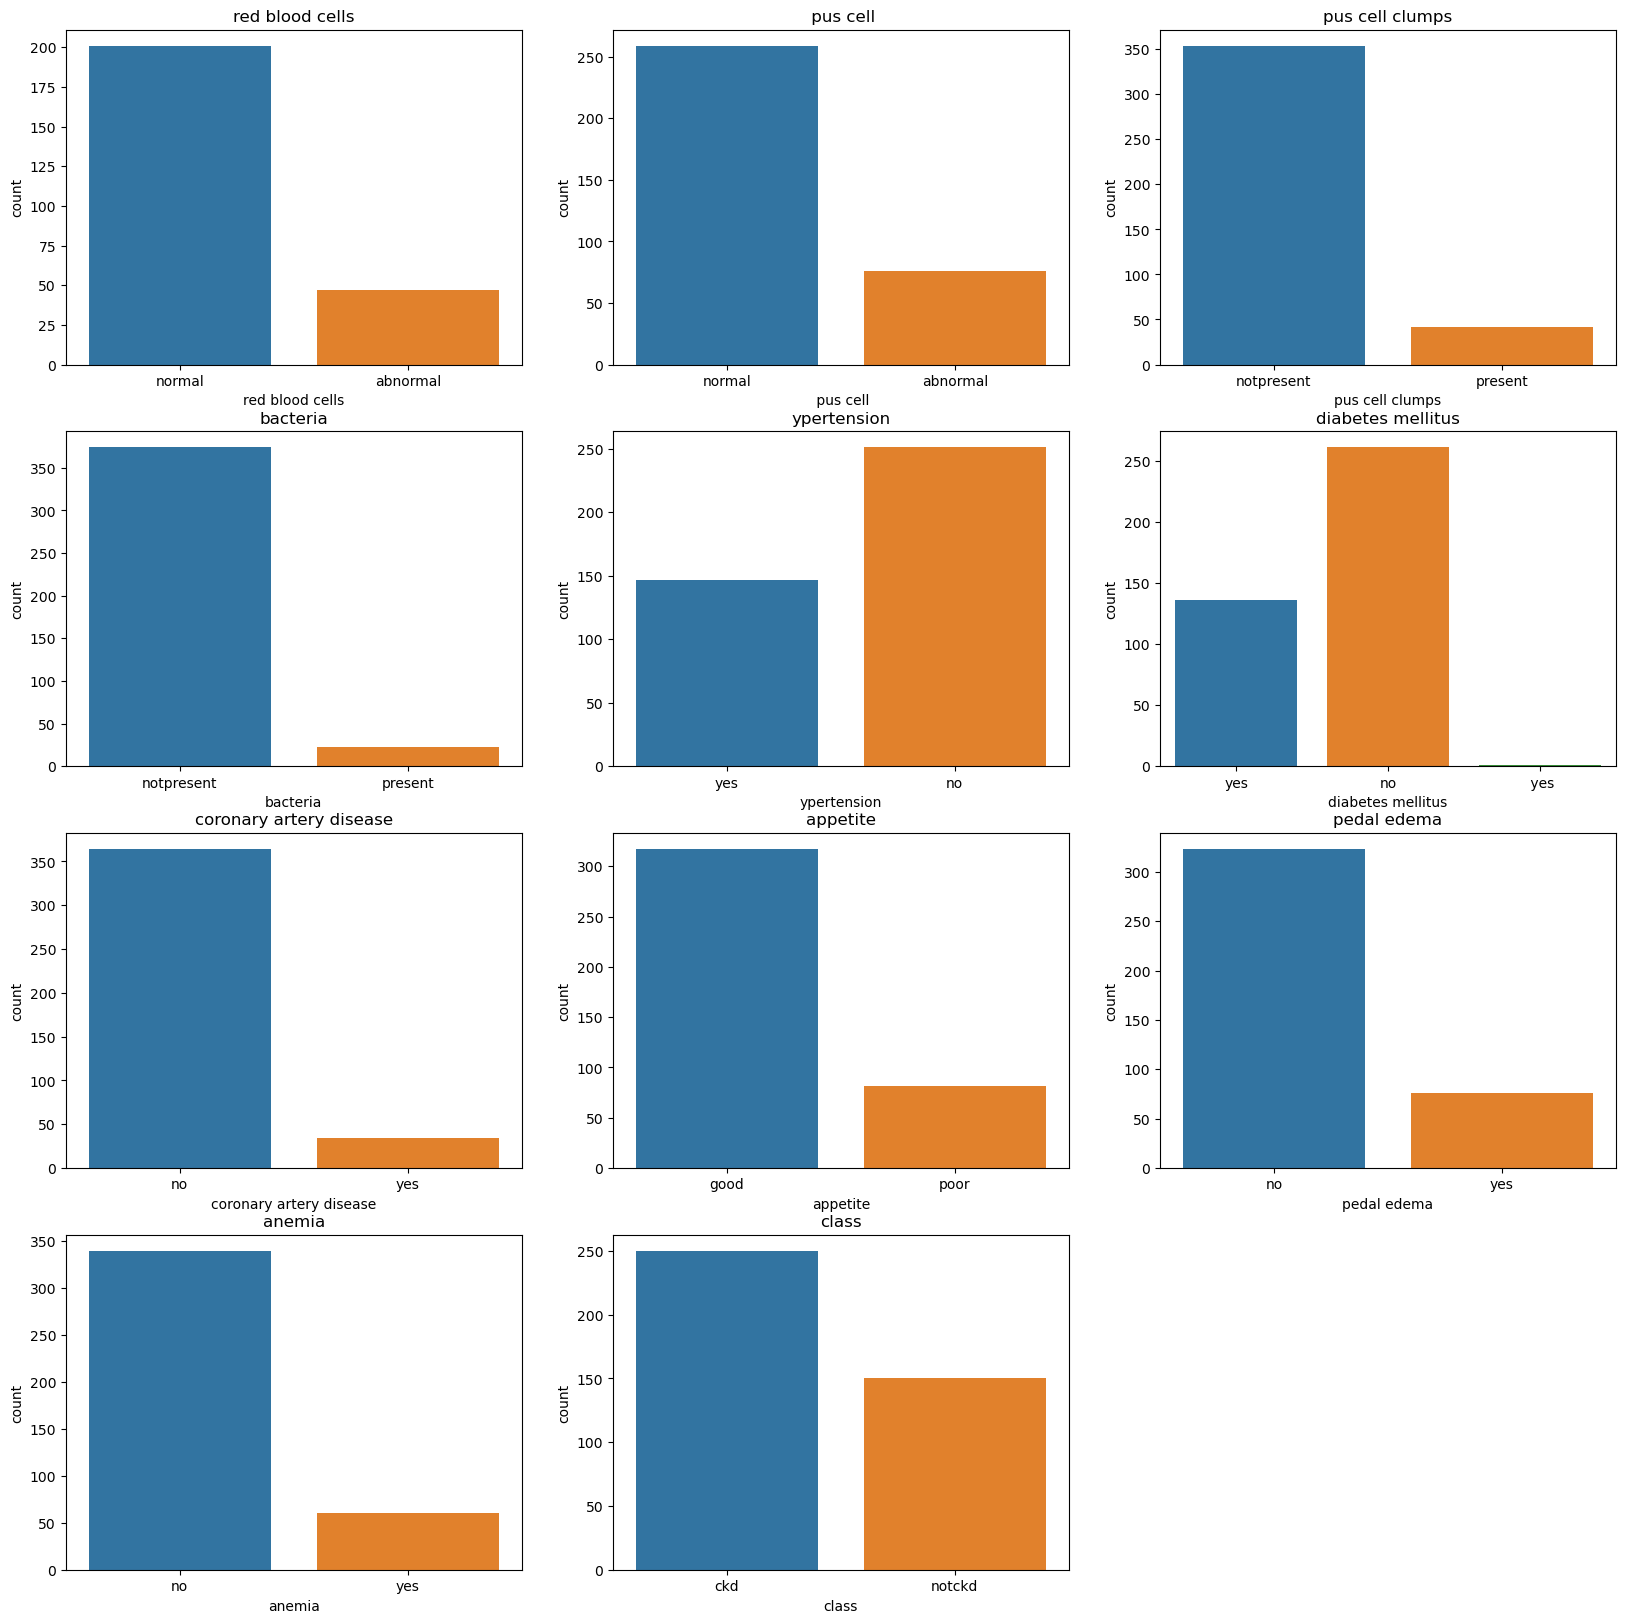

In [232]:
mat.figure(figsize=(20,20))

for i, feature in enumerate(objects):
    mat.subplot(4, 3, i+1)
    se.countplot(data=df, x=feature)
    mat.title(feature)

/var/folders/5y/fmk3xff14g7dlkd0mz_zdgvc0000gn/T/ipykernel_81681/3861156432.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

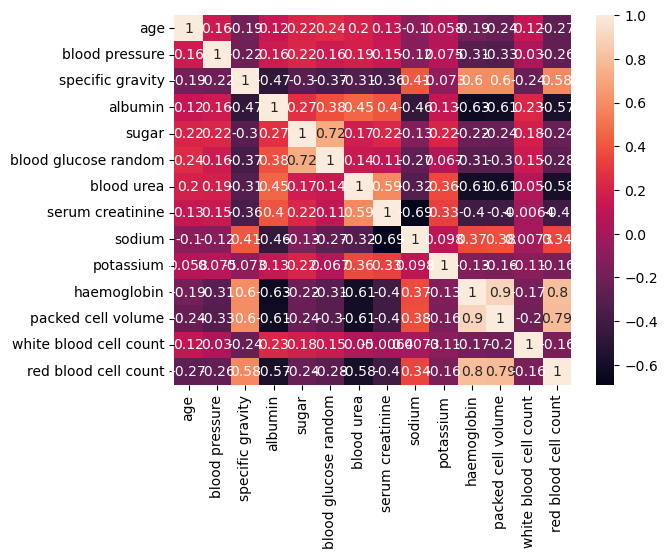

In [233]:
se.heatmap(df.corr(), annot=True)

In [234]:
df.groupby(['red blood cells', 'class'])['red blood cell count'].agg(['count', 'mean', 'min', 'max'])

count      mean  min  max
red blood cells class                            
abnormal        ckd        25  3.832000  2.5  5.6
normal          ckd        40  3.782500  2.1  8.0
                notckd    134  5.368657  4.4  6.5

In [235]:
import plotly.express as px

In [236]:
px.violin(df, y='red blood cell count', x='class', color='class')

In [237]:
px.scatter(df, x='haemoglobin', y='packed cell volume')

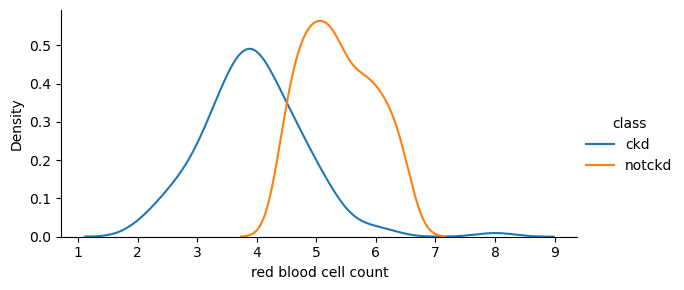

In [238]:
grid = se.FacetGrid(df, hue='class', aspect=2)
grid.map(se.kdeplot, 'red blood cell count')
grid.add_legend()

In [239]:
def violin_auto(column):
    figure = px.violin(df, y=column, x='class', color='class', box=True)
    return figure.show()

In [240]:
def scatter_auto(col1, col2):
    figure = px.scatter(df, x=col1, y=col2, color='class')
    return figure.show()

In [241]:
def kde_auto(feature):
    grid = se.FacetGrid(df, hue='class', aspect=2)
    grid.map(se.kdeplot, feature)
    grid.add_legend()

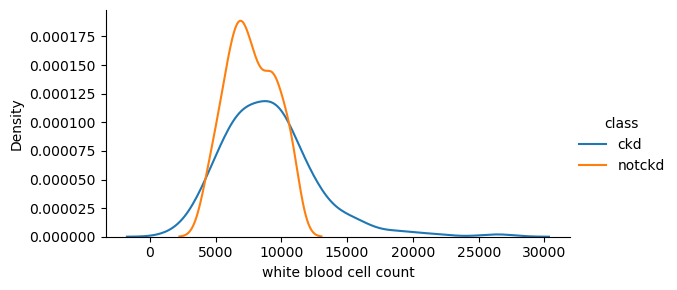

In [242]:
kde_auto('white blood cell count')

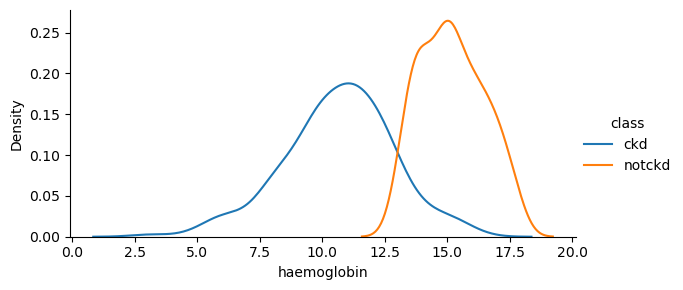

In [243]:
kde_auto('haemoglobin')

In [244]:
scatter_auto("red blood cell count", "packed cell volume")

In [245]:
scatter_auto("red blood cell count", "haemoglobin")

In [246]:
scatter_auto("haemoglobin", "packed cell volume")

In [247]:
violin_auto('red blood cell count')

In [248]:
violin_auto('packed cell volume')

In [249]:
scatter_auto('red blood cell count', 'albumin')

In [250]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [251]:
data=df.copy()

In [252]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [253]:
random_sample = data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())

In [254]:
random_sample

252      normal
302      normal
317      normal
270      normal
343      normal
         ...   
384      normal
361      normal
11     abnormal
90       normal
351      normal
Name: red blood cells, Length: 152, dtype: object

In [255]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [256]:
random_sample.index

Int64Index([252, 302, 317, 270, 343, 251, 130, 167, 386, 190,
            ...
            305, 333, 191, 171, 329, 384, 361,  11,  90, 351],
           dtype='int64', length=152)

In [257]:
random_sample.index = data[data['red blood cells'].isnull()].index

In [258]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [259]:
data.loc[data['red blood cells'].isnull(), 'red blood cells']=random_sample

In [260]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [261]:
data['red blood cells'].isnull().sum()

0

In [262]:
def random_value_replaces_null(feature):
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature]=random_sample

In [263]:
for i in numericals:
    random_value_replaces_null(i)

In [264]:
data[numericals].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [265]:
data[objects].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [266]:
random_value_replaces_null(' pus cell')

In [269]:
def use_average(feature):
    mode = data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [270]:
for i in objects:
    use_average(i)

In [271]:
data[objects].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [272]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,97.0,...,38.0,6000.0,6.5,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [273]:
for i in objects:
    print("{} has {} categories".format(i, data[i].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [274]:
from sklearn.preprocessing import LabelEncoder

In [275]:
encoder = LabelEncoder()

In [276]:
for i in objects:
    data[i] = encoder.fit_transform(data[i])

In [277]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,97.0,...,38.0,6000.0,6.5,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [278]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [280]:
independent_col = [i for i in data.columns if i!='class']
dependent_col = 'class'

In [284]:
X = data[independent_col]
y = data[dependent_col]

In [285]:
X.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,97.0,...,11.3,38.0,6000.0,6.5,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,5.8,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [286]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [287]:
best_features = SelectKBest(score_func=chi2, k=20)
best_features = best_features.fit(X, y)

In [289]:
feature_scores = pd.DataFrame(best_features.scores_, columns=['Score'])

In [290]:
feature_scores

,Score
0,105.154763
1,78.718753
2,0.005957
3,246.090141
4,112.200000
5,10.263983
6,13.633440
7,25.200000
8,13.200000
9,2449.407254


In [291]:
cols = pd.DataFrame(X.columns)

In [292]:
feature_ranks = pd.concat([cols, feature_scores], axis=1)

In [293]:
feature_ranks

,0,Score
0,age,105.154763
1,blood pressure,78.718753
2,specific gravity,0.005957
3,albumin,246.090141
4,sugar,112.200000
5,red blood cells,10.263983
6,pus cell,13.633440
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2449.407254


In [294]:
feature_ranks.columns=['features', 'Score']

In [295]:
feature_ranks

,features,Score
0,age,105.154763
1,blood pressure,78.718753
2,specific gravity,0.005957
3,albumin,246.090141
4,sugar,112.200000
5,red blood cells,10.263983
6,pus cell,13.633440
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2449.407254


In [296]:
feature_ranks.nlargest(10, "Score")

,features,Score
16,white blood cell count,11801.414968
9,blood glucose random,2449.407254
10,blood urea,2412.681817
11,serum creatinine,354.955331
15,packed cell volume,316.656684
3,albumin,246.090141
14,haemoglobin,137.704923
4,sugar,112.200000
0,age,105.154763
18,ypertension,88.200000


In [298]:
best_cols = feature_ranks.nlargest(10, "Score")['features'].values

In [299]:
best_cols

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'sugar', 'age', 'ypertension'], dtype=object)

In [300]:
X_new = data[best_cols]

In [301]:
X_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,sugar,age,ypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,0.0,48.0,1
1,6000.0,97.0,18.0,0.8,38.0,4.0,11.3,0.0,7.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,3.0,62.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,0.0,48.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,0.0,51.0,0


In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0, test_size=0.25)

In [305]:
from xgboost import XGBClassifier

In [309]:
classifier=XGBClassifier()

In [311]:
hyperparameters={
    'learning_rate' : [0.05, 0.2, 0.25, 0.5],
    'max_depth' : [1, 5, 8, 10],
    'min_child_weight' : [1,3,5,7],
    'gamma' : [0, 0.1, 0.2, 0.4],
    'colsample_bytree' : [0.1, 0.3, 0.4, 0.,7]
}

In [312]:
from sklearn.model_selection import RandomizedSearchCV

In [313]:
random_score_search=RandomizedSearchCV(classifier, param_distributions=hyperparameters, n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [314]:
random_score_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/puneetpalpowar/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/puneetpalpowar/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/puneetpalpowar/anaconda3/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/Users/puneetpalpowar/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
  File

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.4, 0.0,
                                                             7],
                                        'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25, 0.5],
                                        'max_depth': [1, 5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [316]:
random_score_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [317]:
random_score_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [318]:
classifier=random_score_search.best_estimator_

In [319]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [321]:
y_pred=classifier.predict(X_test)

In [322]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [323]:
from sklearn.metrics import confusion_matrix, accuracy_score

[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=7, gamma=0, learning_rate=0.5, max_depth=5, min_child_weight=7;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=1;, score=0.999 total time=   0.1s
[CV 3/5] END colsample_bytree=7, gamma=0, learning_rate=0.5, max_depth=5, min_child_weight=7;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.25, max_depth=8, min_child_weight=5;, score=0.988 total time=   0.1s
[CV 1/5] END colsample_bytree=7, gamma=0, learning_rate=0.5, max_depth=5, min_child_weight=7;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=1;, score=0.984 total time=   0.1s
[CV 5/5] END colsample_bytree=7, gamma=0, learning_rate=0.5, max_depth=5, min_child_weight=7;, score=nan t

In [324]:
confusion_matrix(y_test, y_pred)

array([[60,  2],
       [ 0, 38]])

In [325]:
accuracy_score(y_test, y_pred)

0.98